# Self-study Lab 1: Model Representation for Linear Regression

## Objectives

In this self-study notebook you will:

- Learn to implement the model $f_{w,b}$ for linear regression with one variable
- Visualize the data and the linear regression model using matplotlib.pyplot
- Learn how to read data from a text file or an excel csv file

## Tools

In this lab you will use:
- Numpy, a popular library for scientific comuting.
- Matplotlib, a popular library for plotting data

Numpy is good at handling multiplication of matrices and dot product of two vectors. It can do more than what just mentioned.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Problem statement

In this lab, you will use the motivating example from medical cost for people in one particular regiion. The full data can be downloaded from github (link: https://github.com/stedy/Machine-Learning-with-R-datasets). The data consists of a table with $7$ columns as follows:

Age | sex | bmi | children | smoker | region | charges
----| ----| --- | -------- | ------ | ------ | -------

The goal is to predict the medicial cost for one new person record according to the existing record. Thus, the first six columns correspond to the input data and the last column to the output data. 

We don't want to make it complicated in your first touch in machine learning and linear regression model. For now, let us assume that the *oversimplifed* data table with only two data points

Age | Charges 
----| -----------
18  | 1720
25  | 2750

The two data points are just made up based on two records in the excel file provided in github. These data are of course oversimplified and just for educational purpose.

Run the following code cell to create your training data. The data is stored in one-dimensional Numpy arrays.

In [7]:
x_train = np.array([18, 25])
y_train = np.array([1720, 2750])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [18 25]
y_train = [1720 2750]


### Number of training examples $m$

We will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter to do this neatly. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples shown below

In [11]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training example = {m}")

x_train.shape: (2,)
Number of training example = 2


### Training example $x^{(i)}, y^{(i)}$

We use $(x^{(i)}, y^{(i)})$ to denote $i^\mathrm{th}$ training example. It is important to remember that Python is <font color:red>zero indexed </font> so that the first training example corresponding to the index $O$. As such we may write 
$$\begin{aligned} (x^{(0)}, y^{(0)}) &= (18, 1720), \\ (x^{(1)}, y^{(1)}) &= (25, 2750).\end{aligned}$$ 
This is probably a bit different from the lecture in which we normally name the first training example as number $1$. However, it does not matter as we can rename the first example as number $0$ when convenient.

In [12]:
for i in range(m):
    x_i = x_train[i]
    y_i = y_train[i]
    print(f"x^({i}), y^({i}) = ({x_i}, {y_i})")

x^(0), y^(0) = (18, 1720)
x^(1), y^(1) = (25, 2750)


### Plotting the data

We can plot the data points by using `scatter()` function in the `matplotlib` library. The function keyword arguments `marker` and `c` allow us to choose the marker style and the color. There are many more keyword arguments for the function `scatter()`.

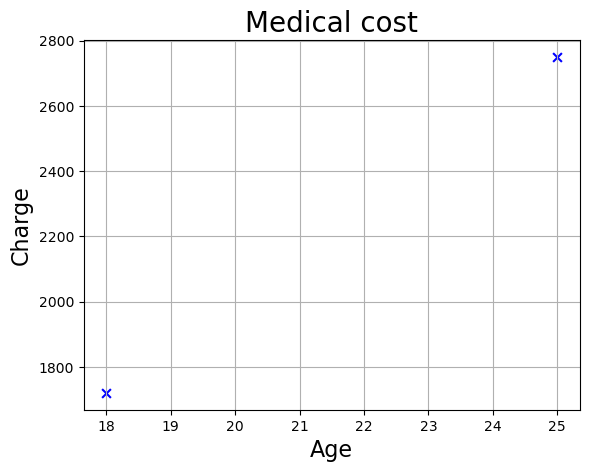

In [15]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='b', s=40)  # s --> size of the marker
plt.grid(True)                             # turn on the grid
plt.xlabel('Age', fontsize=16)             # label for x-axis
plt.ylabel('Charge', fontsize=16)          # label for y-axis
plt.title('Medical cost', fontsize=20)     # title for the whole plot
plt.show()

## Model function

The model function for linear regression is represented as
$$f_{w,b}(x) = w x + b \quad\Rightarrow \quad f_{w,b}(x^{(i)}) = w x^{(i)} + b \quad \forall i$$

The formula above is how we can represent straight lines. Different values of $w$ and $b$ give different straight lines on the plot. Let us try to visualize the linear regression model on the plot. Of course, we compute $y^{(i)}$ for each $x^{(i)}$ using a for loop. However, whenever we need to change the model parameters, i.e. $w$ and $b$, we must redefine them and rerun the code. This can be done but the strategy is not neat. Instead, we can write a function to do the job. As such, the parameters $w$ and $b$ will be input for the function alongside the natural input $x$.

In [20]:
def compute_model_output(x, w, b):
    """
    Compute the prediction of a linear model
    Args:
        x (ndarray (m,)): Data, m examples
        w, b (scalar)   : model parameters
    Returns:
        y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)  # vector of m elements
    # Write your code here: 
    # Remember to go through all the training example with for loop
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

**Remark**

Think about the above code again. Do we really need to write a for loop in this case? Do we even need to write a function at all in the first place?

In [21]:
f_wb = lambda x, w, b: w * x + b

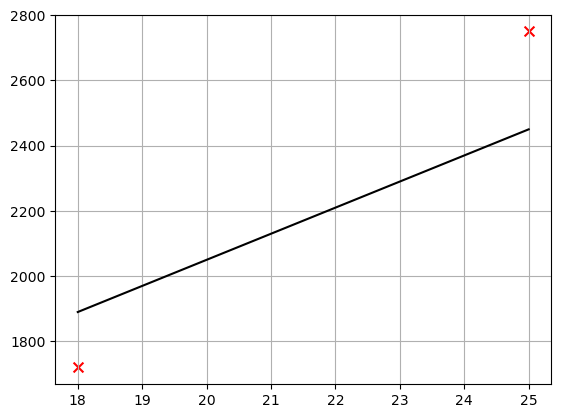

In [31]:
# Plot our model prediction
w = 80
b = 450
plt.plot(x_train, compute_model_output(x_train, w, b), 'k-', label='Model prediction')

plt.scatter(x_train, y_train, marker='x', c='r', s=50, label='actual value')
plt.grid(True)

### Challenge

1. Try experimenting with different values of $w$ and $b$. What should they be for a line that fits our data perfectly?
2. Instead of experimenting with trial-and-error, why don't you try to compute $w$ and $b$ directly?

Hint: Now, you have a function $y = f_{w,b}(x)$. The straight line that fits perfectly the data points should satisfy the two equations $$f_{w,b}(x^{(0)}) = y^{(0)}, f_{w,b}(x^{(1)}) = y^{(1)}.$$ Writting these two equations explicitly in terms of $w$ and $b$, we have two linear equations for two unknown, i.e. $w$ and $b$.

## Congratulation!!!